# ApacheSpark

In [3]:
import findspark
findspark.init()

import pyspark
sc = pyspark.SparkContext(appName="rdd")

22/01/30 12:35:16 WARN Utils: Your hostname, IFernandes resolves to a loopback address: 127.0.1.1; using 192.168.240.163 instead (on interface eth0)
22/01/30 12:35:16 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/01/30 12:35:18 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/01/30 12:35:19 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [3]:
rdd = sc.parallelize(range(100)) # saved in ApacheSpark memory - best solution
rdd2 = range(100) # saved in local driver - worse solution for parallelization

22/01/29 20:30:44 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/01/29 20:30:44 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


## Functional programming
lambda functions, applying a function to a set of data. \
then parallelization takes place by taken sub samples of this list and processing them at different nodes/cores.

In [12]:
# functional programming
rdd = sc.parallelize(range(100))
rdd.map(lambda x: x+1)

PythonRDD[7] at RDD at PythonRDD.scala:53

In [15]:
rdd.take(10), rdd.map(lambda x: x+1).take(10)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [17]:
sc.parallelize(range(1,101)).reduce(lambda a,b: a+b)

5050

## RDD - Resilient Distributed Dataset and DataFrames

ApacheSparkSQL

In [ ]:
# accessing cloudant from ApacheSpark
cloudantdata = sparSession.read.format("com.cloudant.spark").\
option("cloudant.host", ""). \
option("cloudant.username", ""). \
option("cloudant.password", ""). \
load("device_name")

In [ ]:
cloudantdata.count()

In [ ]:
cloudantdata.createOrReplaceTempView("device_name")
sqlDF = spark.sql("SELECT * FROM device_name")
sqlDF.show()

## Math and Statistics on ApacheSpark

In [127]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
    
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()

In [128]:
import random
rddX = sc.parallelize(random.sample(list(range(100)),100))
rddY = sc.parallelize(random.sample(list(range(100)),100))

In [130]:
meanX = rddX.sum()/float(rddX.count())
meanY = rddY.sum()/float(rddY.count())
print (meanX, rddX.mean())
print (meanY)

49.5 49.5
49.5


In [131]:
# standard deviation
import math
stdd = math.sqrt(rdd.map(lambda x: pow(x-meanX,2)).sum()/n)

In [132]:
# skewness
rdd.map(lambda x: pow(x-meanX,3)/pow(stdd,3)).sum()/n

# kurtosis - shape of the data and outliers content within the data
kurt = rdd.map(lambda x: pow(x-meanX,4)/pow(stdd,4)).sum()/n
kurt

1.7997599759975997

In [135]:
# Covariance and correlation
n = rddXY.count()
## covariance
rddXY = rddX.zip(rddY)
covXY = rddXY.map(lambda x_y : (x_y[0]-meanX)*(x_y[1]-meanY)).sum()/n
covXY

## correlation: corr = covarXY / (stdX * stdY)
from math import sqrt
stdX = sqrt(rddX.map(lambda x : pow(x-meanX,2)).sum()/n)
stdY = sqrt(rddY.map(lambda x : pow(x-meanY,2)).sum()/n)
print (stdX, stdY)

corrXY = covXY / (stdX*stdY)
corrXY

28.86607004772212 28.86607004772212


0.04537653765376538

In [158]:
## Correlation matrix
column1 = sc.parallelize(range(100))
column2 = sc.parallelize(range(100,200))
column3 = sc.parallelize(list(reversed(range(100))))
import random
column4 = sc.parallelize(random.sample(range(100),100))

data = column1.zip(column2).zip(column3).zip(column4).map(lambda a_b_c_d : (a_b_c_d[0][0][0],a_b_c_d[0][0][1],a_b_c_d[0][1],a_b_c_d[1]).map(lambda a_b_c_d : [a_b_c_d[0],a_b_c_d[1],a_b_c_d[2],a_b_c_d[3]])) 
#data.map(lambda a_b_c_d : [a_b_c_d[0],a_b_c_d[1],a_b_c_d[2],a_b_c_d[3]]).take(10)
from pyspark.mllib.stat import Statistics
print(Statistics.corr(data))


In [125]:
a =[1,2,3,4,5,6,7,8,9,10]
b = [7,6,5,4,5,6,7,8,9,10]
import pandas as pd
di = {"d1":a,"d2":b}
data = pd.DataFrame(di)
data.corr(), data.cov()

(          d1        d2
 d1  1.000000  0.709273
 d2  0.709273  1.000000,
           d1        d2
 d1  9.166667  4.055556
 d2  4.055556  3.566667)

### ApacheSpark run test

In [ ]:
import findspark
findspark.init()

import pyspark
import random

sc = pyspark.SparkContext(appName="Pi")

num_samples = 100000000

def inside(p):     
  x, y = random.random(), random.random()
  return x*x + y*y < 1

count = sc.parallelize(range(0, num_samples)).filter(inside).count()

pi = 4 * count / num_samples
print(pi)

sc.stop()

# Plotting with ApacheSpark and matplotlib

In [172]:
%matplotlib inline
# sampling is important when plotting big datasets
df = spark.read.parquet('./Assignments/washing.parquet')
df.createOrReplaceTempView('washing')
df.show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

## Boxplot

In [171]:
voltage = spark.sql("SELECT voltage from washing where voltage is not null")
# voltage.collect() # this is encapsulated as a wrong data type for python and for visualization. Do it as follow:
voltage.rdd.map(lambda row: row.voltage).collect()
# sampling.. not necessary now, but might be necessary for some big data 
voltage_array = voltage.rdd.map(lambda row: row.voltage).sample(False, 0.10).collect()
voltage_array

[228,
 234,
 224,
 233,
 228,
 229,
 224,
 226,
 225,
 234,
 235,
 235,
 227,
 220,
 237,
 224,
 223,
 237,
 229,
 224,
 237,
 226,
 226,
 221,
 225,
 233,
 246,
 224,
 223,
 223,
 226,
 232,
 232,
 235,
 227,
 238,
 238,
 224,
 220,
 242,
 221,
 220,
 227]

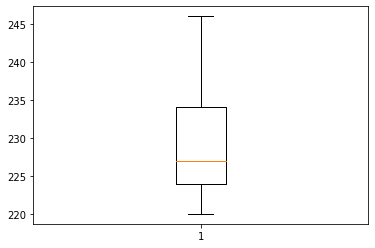

In [174]:
import matplotlib.pyplot as plt
plt.boxplot(voltage_array)
plt.show()

## Runchart - time series

In [197]:
voltageTS = spark.sql("SELECT voltage, ts from washing where voltage is not null ORDER BY ts ASC") # select voltage and time stamp
# it is always good practice to sort values by time stamp again to make sure they are in the correct order

# voltageTS_array = voltageTS.rdd.sample(False,0.10).map(lambda row: (row.ts, row.voltage)).collect() # used to visualize if the data is correctly processed
# voltageTS_array


#********************#
# issue with two arguments within a lambda function when using ApacheSpark RDDs
voltageTS_rdd = voltageTS.rdd.sample(False,0.10).map(lambda row: (row.ts, row.voltage))
voltage_array = voltageTS_rdd.map(lambda ts_voltage: ts_voltage[1]).collect()
ts_array = voltageTS_rdd.map(lambda ts_voltage: ts_voltage[0]).collect()

voltage_array, ts_array

([238,
  227,
  235,
  221,
  236,
  238,
  230,
  236,
  229,
  226,
  224,
  232,
  233,
  220,
  233,
  223,
  236,
  231,
  236,
  224,
  234,
  234,
  235,
  230,
  221,
  229,
  220,
  229,
  220,
  223,
  232,
  222,
  226,
  236,
  247,
  238,
  238,
  235,
  227,
  237,
  230,
  223,
  223],
 [1547808791957,
  1547808830981,
  1547808864037,
  1547808900085,
  1547808912091,
  1547808930101,
  1547808945126,
  1547808948129,
  1547808984163,
  1547809056219,
  1547809083238,
  1547809101247,
  1547809113256,
  1547809128263,
  1547809134265,
  1547809155272,
  1547809233344,
  1547809266373,
  1547809350411,
  1547809380431,
  1547809440473,
  1547809458483,
  1547809500510,
  1547809512522,
  1547809518524,
  1547809527533,
  1547809623592,
  1547809695646,
  1547809746685,
  1547809791714,
  1547809803719,
  1547809857745,
  1547809866750,
  1547809875752,
  1547809905769,
  1547809947789,
  1547809953793,
  1547809959796,
  1547809986805,
  1547809989809,
  1547810001814,
 

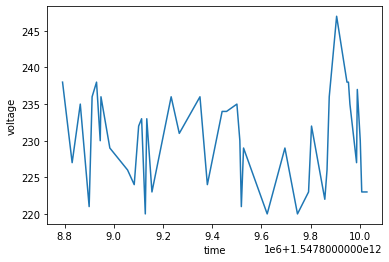

In [198]:
plt.plot(ts_array, voltage_array)
plt.xlabel('time')
plt.ylabel('voltage')
plt.show()